In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.dropna()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [7]:
df.shape

(10683, 11)

In [8]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## Pre-Feature Engineering

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
## Changing Date of Journey to date time and extract weekday, Day, Month

df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')

df['Weekdays'] = pd.Series(df['Date_of_Journey']).dt.day_name()
df['Dep_Day'] = df['Date_of_Journey'].dt.day.astype('int')
df['Dep_Month'] = df['Date_of_Journey'].dt.month.astype('int')

#drop the Date of Journey coloumn

df.drop('Date_of_Journey',axis=1,inplace=True)


In [11]:
## Converting Departure Time and Arrival time Datetime format

df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df['Dep_Hr'] = df['Dep_Time'].dt.hour.astype('int')

In [12]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.time

In [13]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.time

In [14]:
df.sample()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekdays,Dep_Day,Dep_Month,Dep_Hr
1474,IndiGo,Mumbai,Hyderabad,BOM → HYD,16:55:00,18:25:00,1h 30m,non-stop,No info,3175,Saturday,1,6,16


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Weekdays         10683 non-null  object
 11  Dep_Day          10683 non-null  int32 
 12  Dep_Month        10683 non-null  int32 
 13  Dep_Hr           10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [16]:
## Converting Duration into Minutes

df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [17]:
hour = pd.to_numeric(df['Duration'].str.replace(r'\D+', ' ', regex=True).str.split(' ').str[0])*60
mins = pd.to_numeric(df['Duration'].str.replace(r'\D+', ' ', regex=True).str.split(' ').str[1])

# some rows dont have mins. hence will become NaN if add hr and min columns tgt. 
df['Duration_min'] = np.where(mins.isnull(), hour, hour + mins )

In [18]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekdays,Dep_Day,Dep_Month,Dep_Hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,Sunday,24,3,22,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,Wednesday,1,5,5,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,Sunday,9,6,9,1140.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,Sunday,12,5,18,325.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,Friday,1,3,16,285.0


In [58]:
# chaning total_stops to numeric
df.drop(df.index[9039], inplace=True)
df["Total_Stops"] = np.where(df["Total_Stops"] == "non-stop",0,
                         np.where(df["Total_Stops"] == "1 stop",1,
                         np.where(df["Total_Stops"] == "2 stops",2,
                         np.where(df["Total_Stops"] == "3 stops",3,
                         np.where(df["Total_Stops"] == "4 stops",4,0)))))

# EDA

In [59]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekdays,Dep_Day,Dep_Month,Dep_Hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,0,No info,3897,Sunday,24,3,22,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2,No info,7662,Wednesday,1,5,5,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2,No info,13882,Sunday,9,6,9,1140.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1,No info,6218,Sunday,12,5,18,325.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1,No info,13302,Friday,1,3,16,285.0


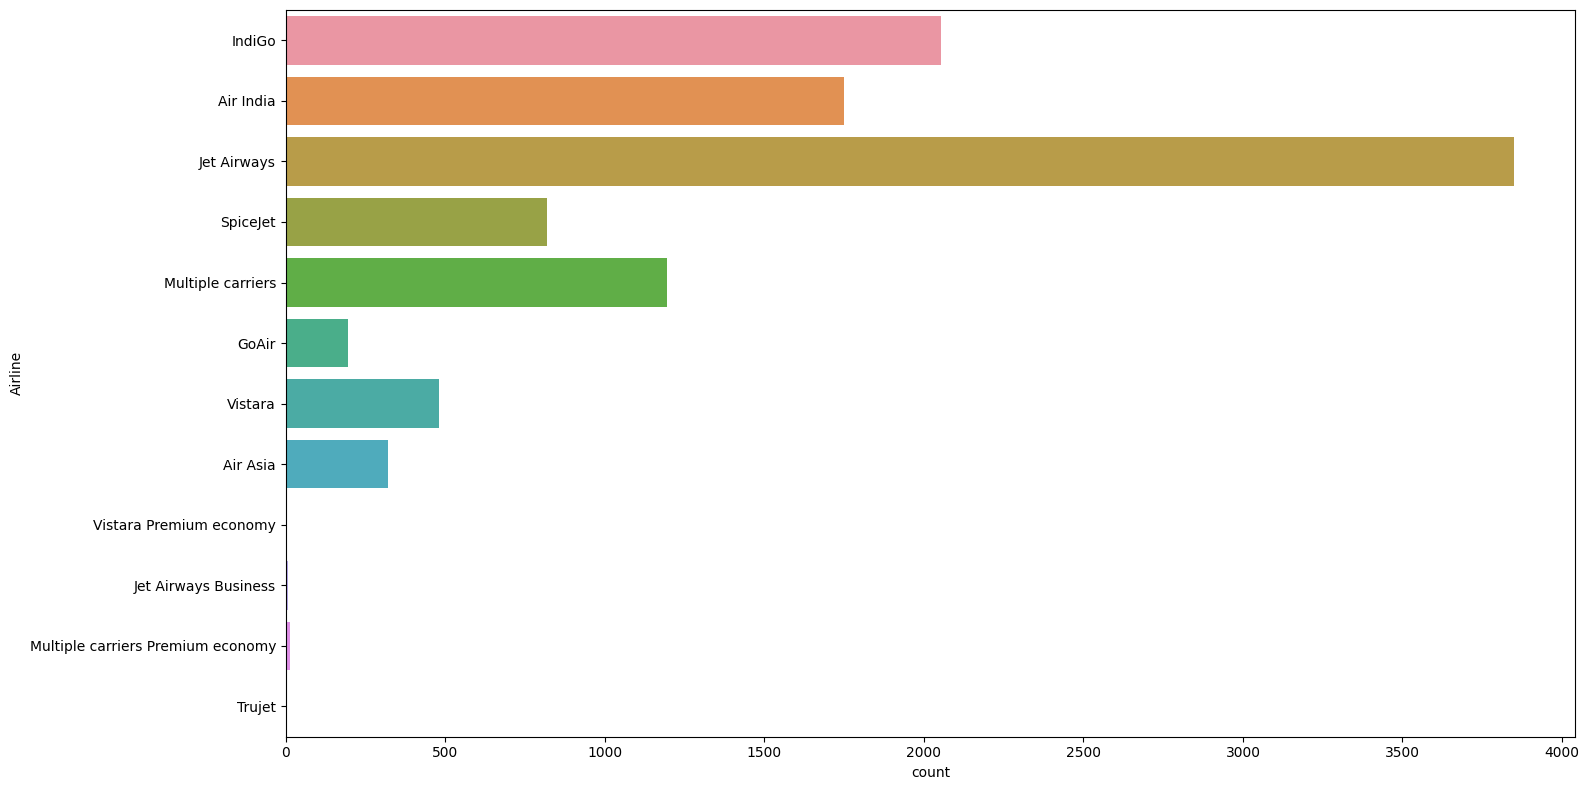

In [60]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,y='Airline')
plt.tight_layout()

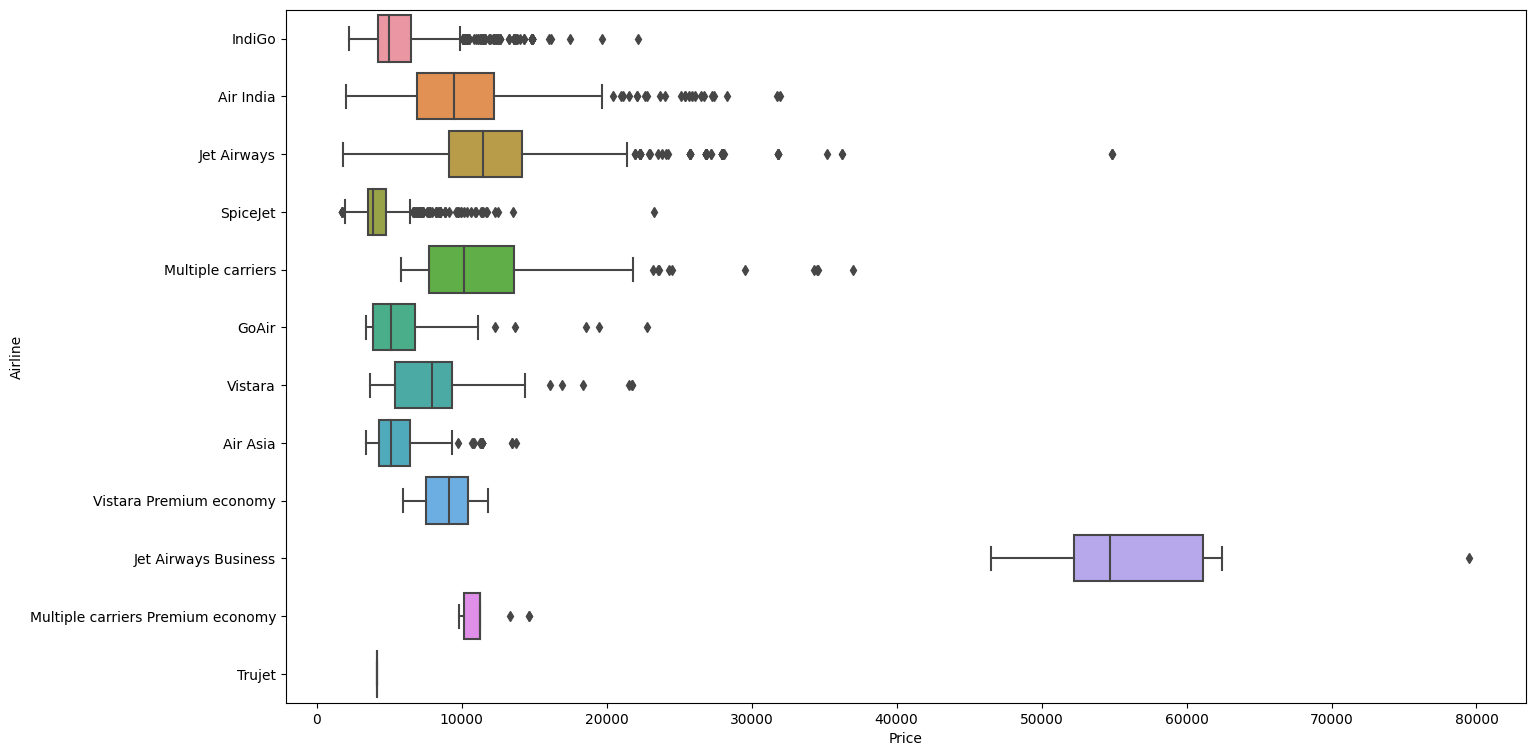

In [61]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['Price'],y=df['Airline'])
plt.show()

<Axes: xlabel='Duration_min', ylabel='Price'>

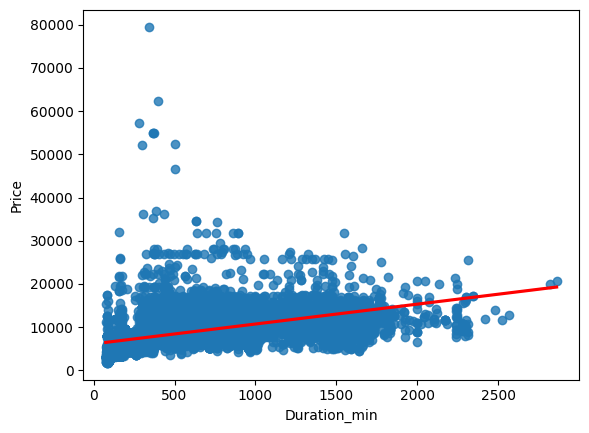

In [62]:
sns.regplot(data=df, x='Duration_min', y='Price',
            line_kws = {"color": "red"})

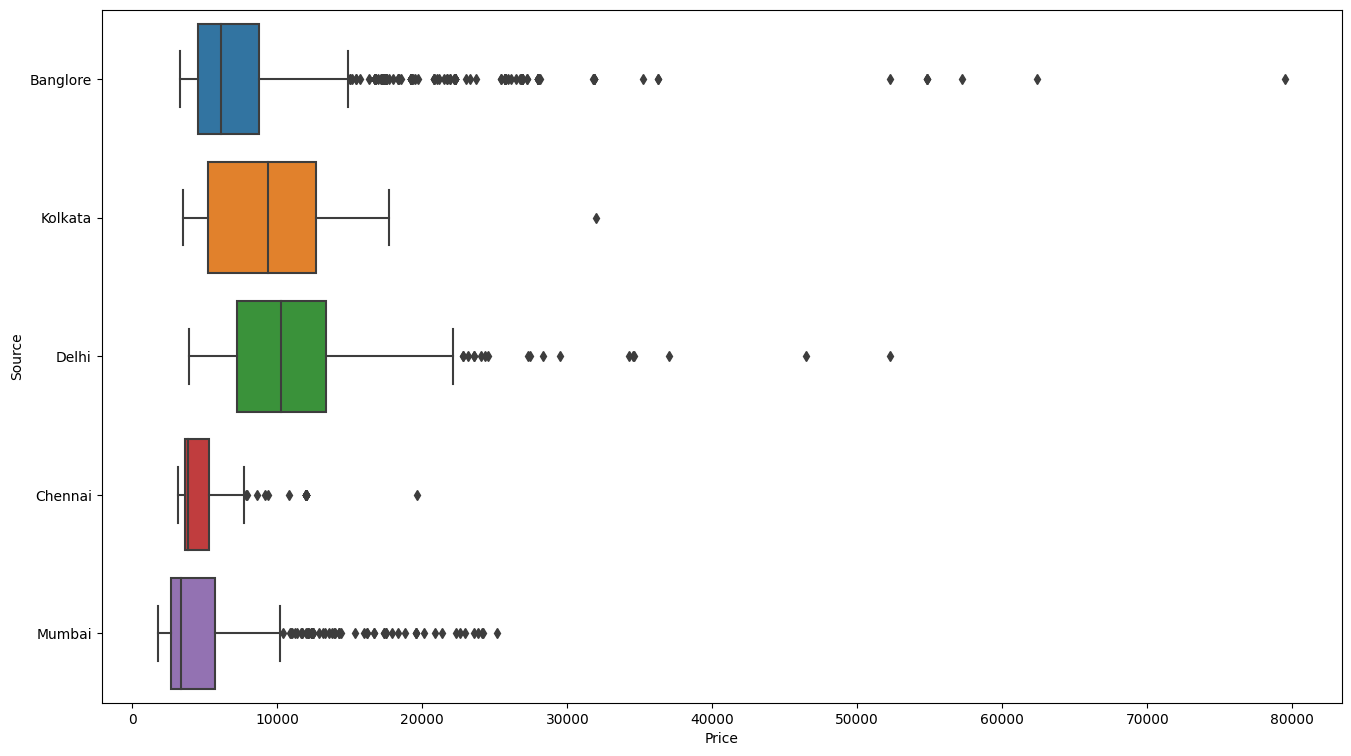

In [63]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df['Price'],y=df['Source'])
plt.show()

<Axes: xlabel='Price', ylabel='Dep_Hr'>

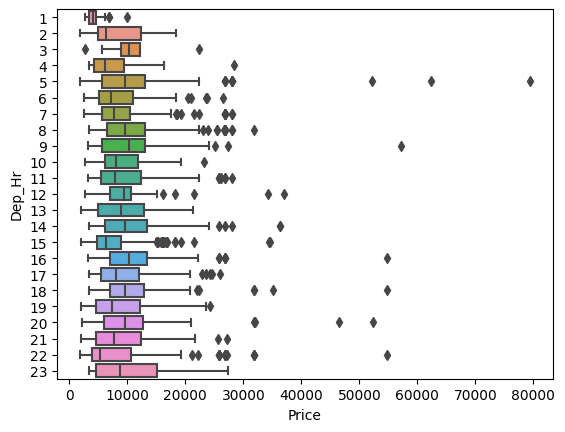

In [64]:
dep_order = [int(x) for x in np.linspace(start=1,stop=23,num=23)]
dep_order = [str(i) for i in dep_order]
sns.boxplot(data=df, x="Price", y=df["Dep_Hr"].astype('string'), order=dep_order)

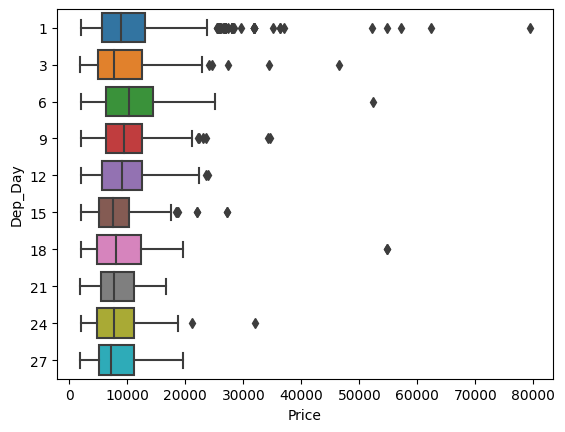

In [65]:
dep_order = np.sort(df["Dep_Day"].unique()).tolist()
dep_order = [str(i) for i in dep_order]
sns.boxplot(data=df, x="Price", y=df["Dep_Day"].astype('string'), order=dep_order)
plt.show()

C:\Users\hp\Desktop\Desktop\Flight_price\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


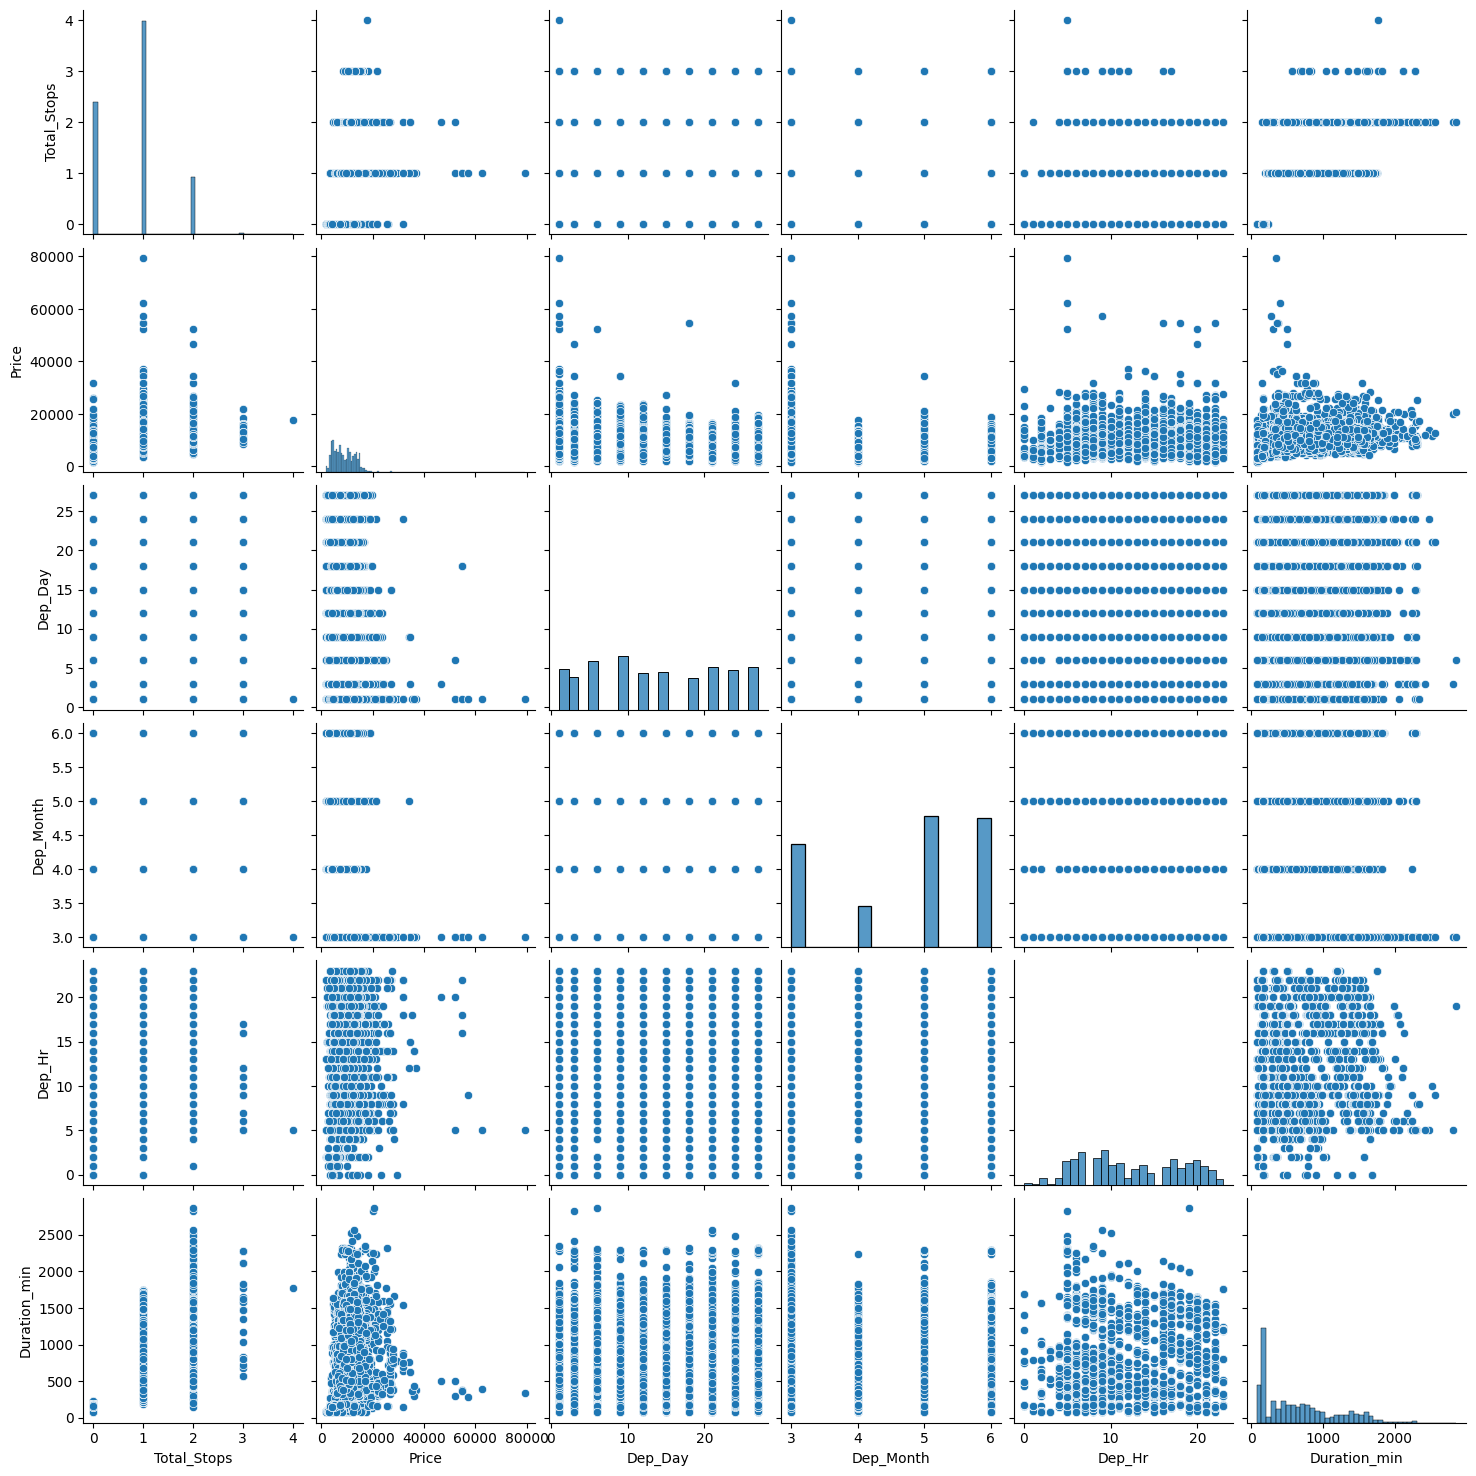

In [66]:
sns.pairplot(df)